In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import datasets, layers, models, losses

2022-03-29 15:18:22.177957: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

x_train,x_test = x_train/255.0,x_test/255.0

x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])

x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)

x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]

x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

2022-03-29 15:18:24.382941: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-29 15:18:24.406256: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:d5:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2022-03-29 15:18:24.406296: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-03-29 15:18:24.409485: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-03-29 15:18:24.409563: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-03-29 15:18:24.410549: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcu

In [6]:
# VGG16
model = models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(224,224, input_shape=x_train.shape[1:], interpolation='bilinear'))

model.add(layers.Conv2D(64, 3, strides=1, padding='same'))
model.add(layers.Conv2D(64, 3, strides=1, padding='same'))
model.add(layers.MaxPool2D(2, strides=2))

model.add(layers.Conv2D(128, 3, strides=1, padding='same'))
model.add(layers.Conv2D(128, 3, strides=1, padding='same'))
model.add(layers.MaxPool2D(2, strides=2))

model.add(layers.Conv2D(256, 3, strides=1, padding='same'))
model.add(layers.Conv2D(256, 3, strides=1, padding='same'))
model.add(layers.Conv2D(256, 1, strides=1, padding='same'))
model.add(layers.MaxPool2D(2, strides=2))

model.add(layers.Conv2D(512, 3, strides=1, padding='same'))
model.add(layers.Conv2D(512, 3, strides=1, padding='same'))
model.add(layers.Conv2D(512, 1, strides=1, padding='same'))
model.add(layers.MaxPool2D(2, strides=2))

model.add(layers.Conv2D(512, 3, strides=1, padding='same'))
model.add(layers.Conv2D(512, 3, strides=1, padding='same'))
model.add(layers.Conv2D(512, 1, strides=1, padding='same'))
model.add(layers.MaxPool2D(2, strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing (Resizing)          (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)      

In [8]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

2022-03-29 15:20:09.477356: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-29 15:20:09.478277: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2000000000 Hz


Epoch 1/10


2022-03-29 15:20:10.416056: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-03-29 15:20:11.123841: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2022-03-29 15:20:12.117871: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-03-29 15:20:12.797068: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-03-29 15:20:13.857343: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


907/907 [==============================] - 158s 167ms/step - loss: 5412316672.0000 - accuracy: 0.1108 - val_loss: 2.3018 - val_accuracy: 0.1070
Epoch 2/10
907/907 [==============================] - 150s 166ms/step - loss: 7962209.0000 - accuracy: 0.1126 - val_loss: 2.3017 - val_accuracy: 0.1070
Epoch 3/10
907/907 [==============================] - 150s 165ms/step - loss: 2151628.2500 - accuracy: 0.1126 - val_loss: 2.3018 - val_accuracy: 0.1070
Epoch 4/10
907/907 [==============================] - 150s 165ms/step - loss: 16433775.0000 - accuracy: 0.1125 - val_loss: 2.3018 - val_accuracy: 0.1070
Epoch 5/10
907/907 [==============================] - 150s 165ms/step - loss: 12182411542528.0000 - accuracy: 0.1126 - val_loss: 2.3016 - val_accuracy: 0.1070
Epoch 6/10
907/907 [==============================] - 150s 165ms/step - loss: 6294798860288.0000 - accuracy: 0.1125 - val_loss: 2.3018 - val_accuracy: 0.1070
Epoch 7/10
907/907 [==============================] - 150s 165ms/step - loss: 1045

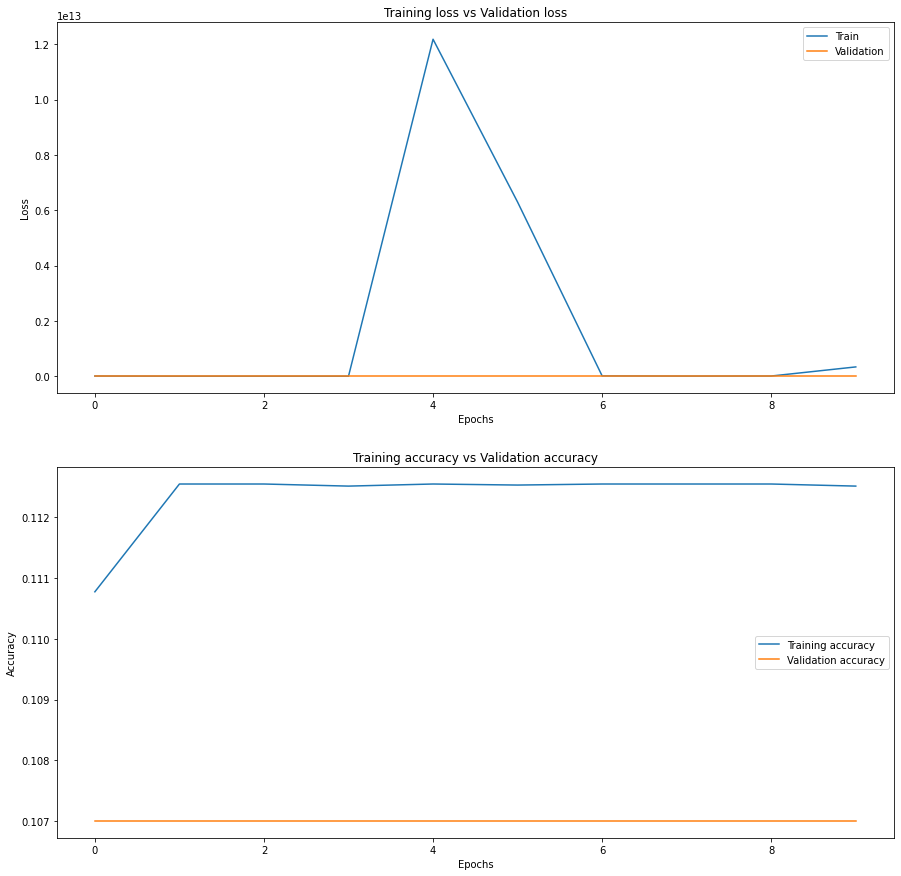

In [14]:
fig, axs = plt.subplots(2,1, figsize=(15,15))
axs[0].plot(model.history.history['loss'])
axs[0].plot(model.history.history['val_loss'])
axs[0].title.set_text("Training loss vs Validation loss")
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Validation'])

axs[1].plot(model.history.history['accuracy'])
axs[1].plot(model.history.history['val_accuracy'])
axs[1].title.set_text("Training accuracy vs Validation accuracy")
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(["Training accuracy", "Validation accuracy"])

# Use a pretrained VGG16 model

In [15]:
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=x_train.shape[1:])

58892288/58889256 [==============================] - 1s 0us/step


In [16]:
for layer in base_model.layers:
  layer.trainable = False

In [17]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [18]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

In [19]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, epochs=40, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 7s 7ms/step - loss: 0.3213 - accuracy: 0.8969 - val_loss: 0.1126 - val_accuracy: 0.9650
Epoch 2/40
907/907 [==============================] - 6s 7ms/step - loss: 0.1862 - accuracy: 0.9391 - val_loss: 0.1235 - val_accuracy: 0.9610
Epoch 3/40
907/907 [==============================] - 6s 7ms/step - loss: 0.1549 - accuracy: 0.9493 - val_loss: 0.0935 - val_accuracy: 0.9700
Epoch 4/40
907/907 [==============================] - 6s 7ms/step - loss: 0.1425 - accuracy: 0.9540 - val_loss: 0.1053 - val_accuracy: 0.9670
Epoch 5/40
907/907 [==============================] - 6s 7ms/step - loss: 0.1343 - accuracy: 0.9555 - val_loss: 0.0813 - val_accuracy: 0.9710
Epoch 6/40
907/907 [==============================] - 6s 7ms/step - loss: 0.1252 - accuracy: 0.9592 - val_loss: 0.0799 - val_accuracy: 0.9790
Epoch 7/40
907/907 [==============================] - 6s 7ms/step - loss: 0.1176 - accuracy: 0.9612 - val_loss: 0.0761 - val_accuracy: 0.9775
Epoch 

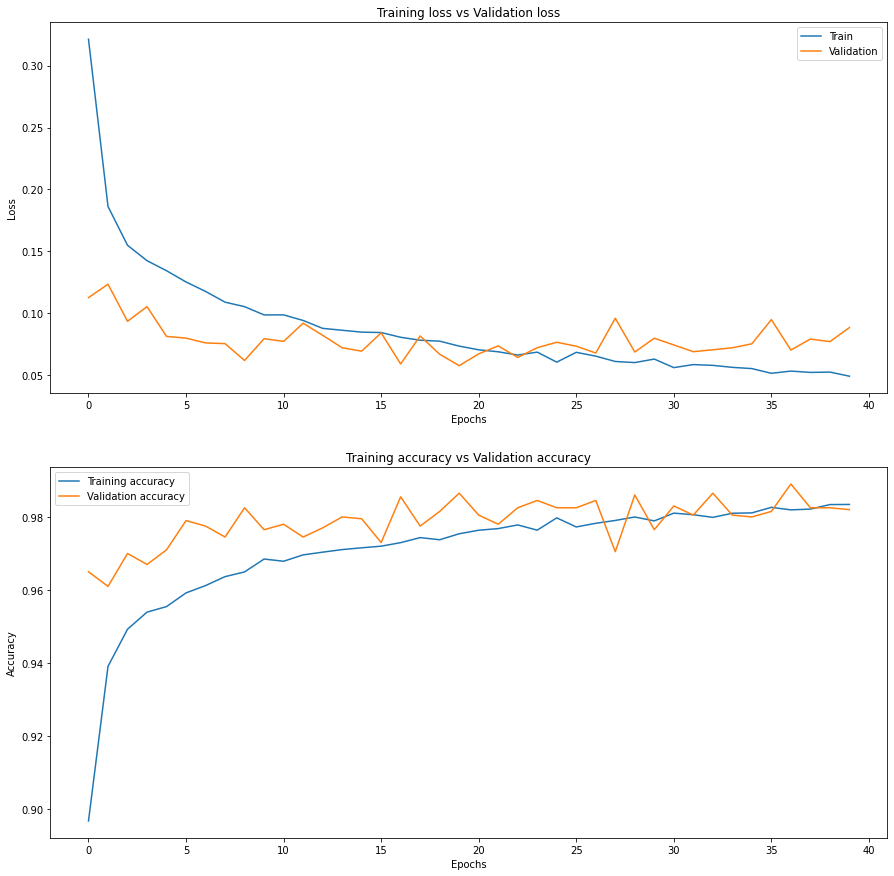

In [21]:
fig, axs = plt.subplots(2,1, figsize=(15,15))
axs[0].plot(model.history.history['loss'])
axs[0].plot(model.history.history['val_loss'])
axs[0].title.set_text("Training loss vs Validation loss")
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train', 'Validation'])

axs[1].plot(model.history.history['accuracy'])
axs[1].plot(model.history.history['val_accuracy'])
axs[1].title.set_text("Training accuracy vs Validation accuracy")
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(["Training accuracy", "Validation accuracy"])